## Case Study on bike-share data
Here, I will perform analysis on the bike share data during the year 2021, to gather insights on how the members and casual users are using the service.

In [96]:
# importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# loading the data
jan_df = pd.read_csv('../input/bikeshare-data/202101-divvy-tripdata/202101-divvy-tripdata.csv')
feb_df = pd.read_csv('../input/bikeshare-data/202102-divvy-tripdata/202102-divvy-tripdata.csv')
mar_df = pd.read_csv('../input/bikeshare-data/202103-divvy-tripdata/202103-divvy-tripdata.csv')
apr_df = pd.read_csv('../input/bikeshare-data/202104-divvy-tripdata/202104-divvy-tripdata.csv')
may_df = pd.read_csv('../input/bikeshare-data/202105-divvy-tripdata/202105-divvy-tripdata.csv')
jun_df = pd.read_csv('../input/bikeshare-data/202106-divvy-tripdata/202106-divvy-tripdata.csv')
jul_df = pd.read_csv('../input/bikeshare-data/202107-divvy-tripdata/202107-divvy-tripdata.csv')
aug_df = pd.read_csv('../input/bikeshare-data/202108-divvy-tripdata/202108-divvy-tripdata.csv')
sep_df = pd.read_csv('../input/bikeshare-data/202109-divvy-tripdata/202109-divvy-tripdata.csv')
oct_df = pd.read_csv('../input/bikeshare-data/202110-divvy-tripdata/202110-divvy-tripdata.csv')
nov_df = pd.read_csv('../input/bikeshare-data/202111-divvy-tripdata/202111-divvy-tripdata.csv')
dec_df = pd.read_csv('../input/bikeshare-data/202112-divvy-tripdata/202112-divvy-tripdata.csv')

In [98]:
# lets have a look at one of the datasets
jan_df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.7200,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.6900,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.7000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.6900,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.7000,casual
5,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,NaN,NaN,41.900409,-87.696763,41.940000,-87.7100,casual
6,09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,California Ave & Cortez St,17660,NaN,NaN,41.900391,-87.696757,41.900000,-87.7100,member
7,DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,California Ave & Cortez St,17660,NaN,NaN,41.900390,-87.696728,41.910000,-87.7000,member
8,C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,California Ave & Cortez St,17660,NaN,NaN,41.900306,-87.696796,41.900000,-87.7000,member
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.6722,member


In [99]:
jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96834 non-null  object 
 1   rideable_type       96834 non-null  object 
 2   started_at          96834 non-null  object 
 3   ended_at            96834 non-null  object 
 4   start_station_name  88209 non-null  object 
 5   start_station_id    88209 non-null  object 
 6   end_station_name    86557 non-null  object 
 7   end_station_id      86557 non-null  object 
 8   start_lat           96834 non-null  float64
 9   start_lng           96834 non-null  float64
 10  end_lat             96731 non-null  float64
 11  end_lng             96731 non-null  float64
 12  member_casual       96834 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB


In [100]:
jan_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [101]:
# check to make sure the column names are consistent across all dataframes
print(feb_df.columns)
print(mar_df.columns)
print(apr_df.columns)
print(may_df.columns)
print(jun_df.columns)
print(jul_df.columns)
print(aug_df.columns)
print(sep_df.columns)
print(oct_df.columns)
print(nov_df.columns)
print(dec_df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [102]:
jan_df.nunique(axis = 0)

ride_id               96834
rideable_type             3
started_at            93736
ended_at              93582
start_station_name      640
start_station_id        638
end_station_name        632
end_station_id          629
start_lat             23731
start_lng             23797
end_lat               22885
end_lng               22796
member_casual             2
dtype: int64

In [103]:
# concatenate all the dataframes into a single dataframe
trips_df = pd.concat([jan_df, feb_df, mar_df, apr_df, may_df, jun_df, jul_df, aug_df, sep_df, oct_df,
                     nov_df, dec_df])
trips_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


In [104]:
trips_df.shape

(5595063, 13)

In [105]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


Now, the *started_at* and *ended_at* columns need to be converted to the type ***datetime***

In [106]:
trips_df['started_at'] = pd.to_datetime(trips_df['started_at'])

In [107]:
trips_df['ended_at'] = pd.to_datetime(trips_df['ended_at'])

Let's go through each of the columns

In [108]:
len(pd.unique(trips_df.ride_id))

5595063

The ***ride_id*** column seems to be fine, with every value being unique, which should be the case.

In [109]:
pd.unique(trips_df.rideable_type)

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

There seems to be 3 types of bikes provided by the service, namely ***electric_bike, classic_bike, docked_bike***.

In [110]:
trips_df.sample(20)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
19476,5736DB98C221EE1A,classic_bike,2021-08-14 14:35:45,2021-08-14 14:36:14,Adler Planetarium,13431,Adler Planetarium,13431,41.866095,-87.607267,41.866095,-87.607267,casual
259110,FEDF34CFF0681CF2,docked_bike,2021-07-05 20:20:24,2021-07-05 22:04:26,Streeter Dr & Grand Ave,13022,Eastlake Ter & Rogers Ave,523,41.892278,-87.612043,42.020887,-87.665058,casual
703945,F6322F6F919D0CBF,classic_bike,2021-07-06 17:29:00,2021-07-06 17:40:05,Streeter Dr & Grand Ave,13022,Lake Shore Dr & North Blvd,LF-005,41.892278,-87.612043,41.911722,-87.626804,member
621545,994D0739C813F48B,classic_bike,2021-10-27 11:01:00,2021-10-27 11:09:42,Benson Ave & Church St,596,Sheridan Rd & Noyes St (NU),604,42.048214,-87.683485,42.058239,-87.677432,casual
133718,26DB012E48F31461,classic_bike,2021-09-15 20:27:37,2021-09-15 20:34:32,Ashland Ave & Division St,13061,Wood St & Chicago Ave,637,41.903450,-87.667747,41.895634,-87.672069,casual
414084,9190AAB3264B5D01,classic_bike,2021-07-23 17:45:51,2021-07-23 18:07:43,Morgan St & Lake St,TA1306000015,Campbell Ave & North Ave,13257,41.885483,-87.652305,41.910535,-87.689556,casual
150196,30B1909119E52CAB,docked_bike,2021-06-19 10:32:19,2021-06-19 11:08:52,Mies van der Rohe Way & Chestnut St,15529,Rush St & Superior St,15530,41.898587,-87.621915,41.895765,-87.625908,casual
299124,CAEBFA41818BED04,electric_bike,2021-09-02 08:57:13,2021-09-02 09:00:52,Franklin St & Lake St,TA1307000111,LaSalle St & Adams St,KA1503000034,41.885896,-87.635826,41.880890,-87.633455,member
752855,94E41F1049D32209,electric_bike,2021-09-17 19:10:41,2021-09-17 19:14:06,NaN,NaN,NaN,NaN,41.920000,-87.650000,41.920000,-87.640000,member
190798,47ADE42837FB0B79,electric_bike,2021-04-20 19:37:08,2021-04-20 19:45:16,Clark St & Armitage Ave,13146,Southport Ave & Wrightwood Ave,TA1307000113,41.918375,-87.636437,41.928808,-87.663606,member


In [111]:
# check for records where ended_at is before started_at
trips_df[(trips_df['ended_at'] - trips_df['started_at']).view(int) < 0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
6592,FC1EFEF4475D7F56,classic_bike,2021-01-09 15:42:45,2021-01-09 15:41:02,Monticello Ave & Irving Park Rd,KA1504000139,NaN,NaN,41.954005,-87.719128,NaN,NaN,member
35752,B1235D38EB2F8A9E,electric_bike,2021-01-06 18:33:12,2021-01-06 18:31:07,Daley Center Plaza,TA1306000010,NaN,NaN,41.883944,-87.629307,41.880000,-87.630000,member
39317,F79335E3A77A57B5,electric_bike,2021-03-29 15:41:21,2021-03-29 15:41:20,Ashland Ave & Belle Plaine Ave,13249,Ashland Ave & Belle Plaine Ave,13249,41.956133,-87.668981,41.956143,-87.668985,member
120830,5D2797A8FFA71B49,classic_bike,2021-03-13 18:02:58,2021-03-13 18:02:57,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910578,-87.649422,41.910578,-87.649422,casual
22361,BC53ECCBC76278FD,classic_bike,2021-04-07 16:11:33,2021-04-07 16:11:26,Ashland Ave & Grand Ave,13434,Ashland Ave & Grand Ave,13434,41.891072,-87.666611,41.891072,-87.666611,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346070,287605D0D79731E6,electric_bike,2021-11-07 01:49:11,2021-11-07 01:13:26,NaN,NaN,NaN,NaN,41.930000,-87.650000,41.970000,-87.700000,casual
355161,8598DCE30427F984,electric_bike,2021-11-07 01:31:33,2021-11-07 01:03:44,Orleans St & Elm St,TA1306000006,NaN,NaN,41.902921,-87.637709,41.930000,-87.660000,casual
357132,5AA2BC364BC7A569,electric_bike,2021-11-07 01:59:53,2021-11-07 01:09:02,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.900000,-87.700000,casual
358579,F4E4485BFB33D916,electric_bike,2021-11-07 01:57:53,2021-11-07 01:27:02,NaN,NaN,NaN,NaN,41.910000,-87.720000,41.900000,-87.770000,casual


In [112]:
# keeping only the records where started_at is before ended_at
trips_df_clean = trips_df[(trips_df['ended_at'] - trips_df['started_at']).view(int) > 0]

In [113]:
trips_df_clean

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


In [114]:
# let's add day, month column to the dataframe
trips_df_clean['weekday'] = pd.DatetimeIndex(trips_df_clean['started_at']).weekday
trips_df_clean['month'] = pd.DatetimeIndex(trips_df_clean['started_at']).month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
trips_df_clean

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,month
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,5,1
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,2,1
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,3,1
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,3,1
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual,6,12
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,0,12
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,3,12
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member,0,12


In [116]:
# check if there is any missing value in member_casual column
trips_df_clean['member_casual'].isnull().sum()

0

In [117]:
trips_df_clean.shape

(5594410, 15)

## Descriptive Analysis
Now, let's do some descriptive analysis with the clean data that we have. Here, we are considering records with missing values in *start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng* as valid trips.

Let's find out the total number of members and casual users in our data.

In [118]:
user_count = trips_df_clean.groupby('member_casual').size().reset_index(name='counts')
user_count

,member_casual,counts
0,casual,2528664
1,member,3065746


We see that out of **5594410** users, **3065746** are annual members and **2528664** are casual users.

Now, let's further aggregate our data by weekdays and see what they tell.

In [119]:
user_by_weekday = trips_df_clean.groupby('weekday').size().reset_index(name='counts')
user_by_weekday

,weekday,counts
0,0,702521
1,1,739831
2,2,756027
3,3,737528
4,4,810421
5,5,990948
6,6,857134


In the above result, 0 denotes **Monday** and 6 denotes **Sunday**. Now, if we observe, we see that the number of trips spikes up during weekends. **Saturday** has the highest number of trips and **Monday** has the lowest, which makes sense as people tend to go out during weekends as they get their time off from regular work schedule.

Next, we aggregate by month and see what we can find.

In [120]:
user_by_month = trips_df_clean.groupby('month').size().reset_index(name='counts')
user_by_month

,month,counts
0,1,96828
1,2,49618
2,3,228484
3,4,337192
4,5,531579
5,6,729529
6,7,822328
7,8,804245
8,9,756040
9,10,631156


In the above dataframe result, as usual, 1 corresponds to **January** and 12 corresponds to **December**. Looking closely, we can see that winter months **January(1),February(2) and December(12)** have the lowest number of trips, which might be, because Chicago gets really chilling cold during winter, whereas, during summer months **July(7), August(8)**, people go out the most on bikes.

## Visualizations
Now, let's plot some graphs and further see what it may tell us.

First, let's create a smaller dataframe grouped by ***member_casual*** and ***weekday*** and then we will plot our first graph using this dataframe.

In [121]:
weekday_users = user_by_weekday = trips_df_clean.groupby(['weekday', 'member_casual']).size().reset_index(name='counts')
weekday_users

,weekday,member_casual,counts
0,0,casual,286340
1,0,member,416181
2,1,casual,274357
3,1,member,465474
4,2,casual,278910
5,2,member,477117
6,3,casual,286038
7,3,member,451490
8,4,casual,364037
9,4,member,446384


In [122]:
# changing the graph background
sns.set_style('darkgrid')

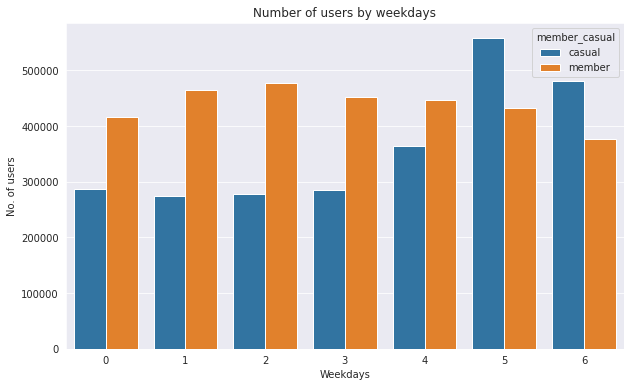

In [123]:
plt.figure(figsize = (10,6))
sns.barplot(data=weekday_users, x='weekday', y='counts', hue='member_casual')
plt.title('Number of users by weekdays')
plt.xlabel('Weekdays')
plt.ylabel('No. of users');

Earlier, we found out that the number of people using the bike services on weekends was much higher than the rest of the weekdays. After observing the above graph, we can infer that it was due to the increase in casual users during weekends. Number of annual members using bike services is almost constant throughout the week.

In [124]:
monthly_users = trips_df_clean.groupby(['month', 'member_casual']).size().reset_index(name='counts')
monthly_users

,month,member_casual,counts
0,1,casual,18117
1,1,member,78711
2,2,casual,10130
3,2,member,39488
4,3,casual,84028
5,3,member,144456
6,4,casual,136590
7,4,member,200602
8,5,casual,256888
9,5,member,274691


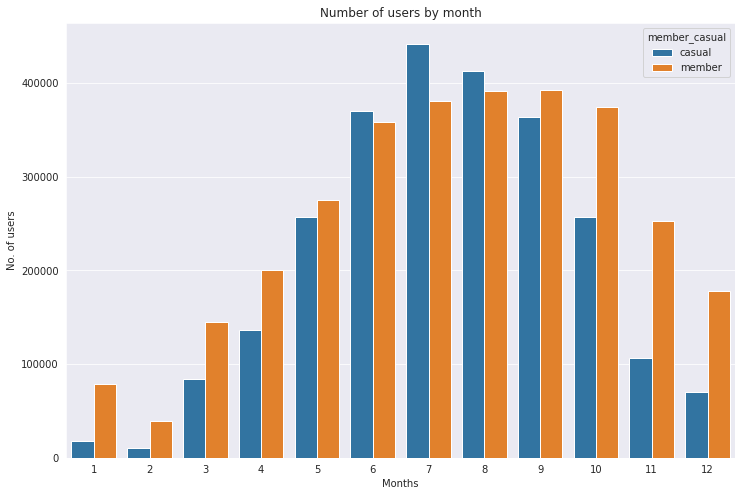

In [125]:
plt.figure(figsize = (12,8))
sns.barplot(data=monthly_users, x='month', y='counts', hue='member_casual')
plt.title('Number of users by month')
plt.xlabel('Months')
plt.ylabel('No. of users');

Looking at the above graph, we can infer that the drop in the number of users during winters is because of the drop in the number of casual users. It is evident that the number of annual members using bike services also drop, but a huge part of it is due to the drop in casual users. In **February**, the number of casual users almost drops to none compared to other months.
Summer months record the most number of trips for both types of users, with the highest in **July**.